<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB
None
                                                text  label_num
0  Subject: enron methanol ; meter # : 988291\r\n...          0
1  Subject: hpl nom for january 9 , 2001\r\n( see...          0
2  Subject: neon retreat\r\nho ho ho , we ' re ar...          0
3  Subject: photoshop , windows , office . cheap ...          1
4  Subject: re : indian springs\r\nthis deal is t...          0
label_num
0    3672
1    1499
Name: count, dtype: int64


/tmp/ipykernel_842/1961994494.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


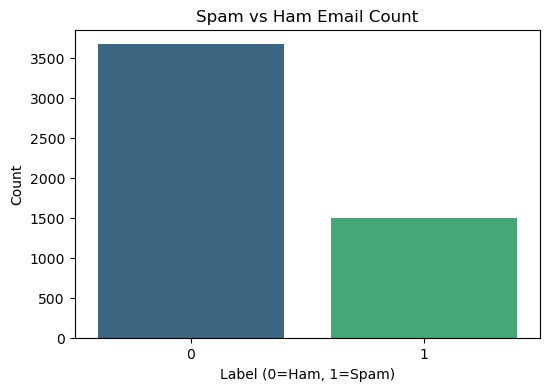

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/newData.csv")  # replace with your file path

# Keep only relevant columns (your CSV already has only these)
df_small = df[['text', 'label_num']].copy()

# Check basic info
print(df_small.info())
print(df_small.head())

# Count of ham vs spam
label_counts = df_small['label_num'].value_counts()
print(label_counts)

# Plot label distribution
plt.figure(figsize=(6,4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.xlabel("Label (0=Ham, 1=Spam)")
plt.ylabel("Count")
plt.title("Spam vs Ham Email Count")
plt.show()


In [22]:
# Keep only relevant columns
df_small = df[['text', 'label_num']].copy()

import re

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'\r\n', ' ', text)              # remove newlines
    text = re.sub(r'[^a-z0-9@$% ]', ' ', text)    # keep letters, numbers, some symbols
    text = ' '.join(text.split())                  # remove extra spaces
    return text

# Create 'clean_text' column
df_small['clean_text'] = df_small['text'].apply(clean_text)


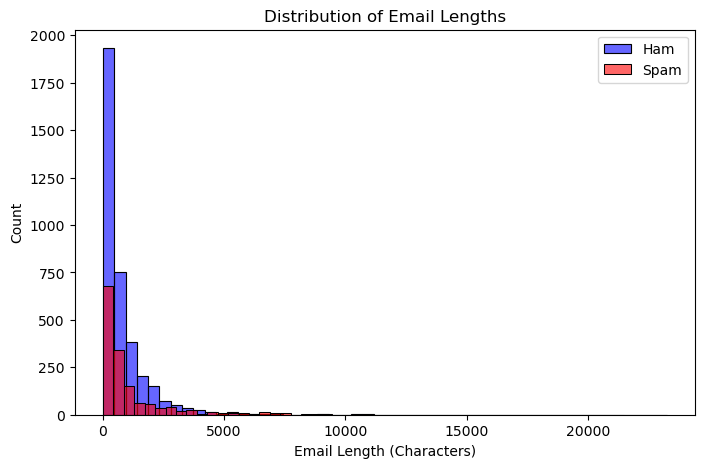

In [23]:
# Map 0/1 to 'ham'/'spam'
df_small['label'] = df_small['label_num'].map({0: 'ham', 1: 'spam'})

# Add a column for text length
df_small['text_length'] = df_small['clean_text'].apply(len)

# Plot histogram of email lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_small[df_small['label']=='ham']['text_length'], color='blue', label='Ham', bins=50, alpha=0.6)
sns.histplot(df_small[df_small['label']=='spam']['text_length'], color='red', label='Spam', bins=50, alpha=0.6)
plt.xlabel("Email Length (Characters)")
plt.ylabel("Count")
plt.title("Distribution of Email Lengths")
plt.legend()
plt.show()


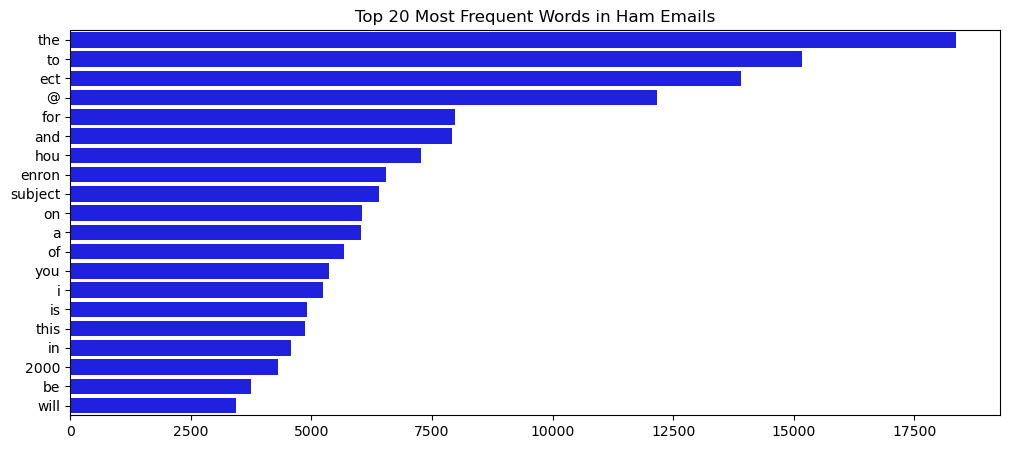

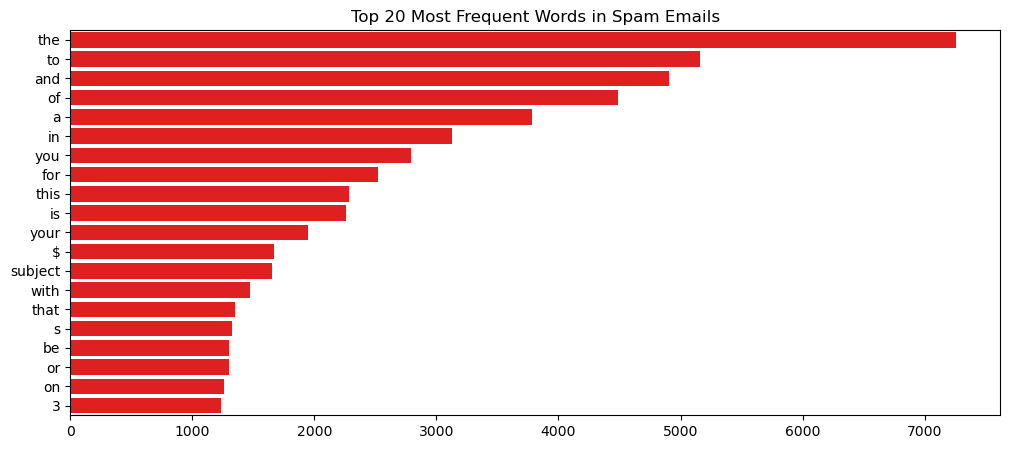

In [24]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure we have the 'label' column
df_small['label'] = df_small['label_num'].map({0: 'ham', 1: 'spam'})

# Split words for ham and spam
ham_words = " ".join(df_small[df_small['label']=='ham']['clean_text']).split()
spam_words = " ".join(df_small[df_small['label']=='spam']['clean_text']).split()

# Count most common words
ham_common = Counter(ham_words).most_common(20)
spam_common = Counter(spam_words).most_common(20)

# Plot top 20 words for Ham
plt.figure(figsize=(12,5))
sns.barplot(x=[x[1] for x in ham_common], y=[x[0] for x in ham_common], color='blue')
plt.title("Top 20 Most Frequent Words in Ham Emails")
plt.show()

# Plot top 20 words for Spam
plt.figure(figsize=(12,5))
sns.barplot(x=[x[1] for x in spam_common], y=[x[0] for x in spam_common], color='red')
plt.title("Top 20 Most Frequent Words in Spam Emails")
plt.show()


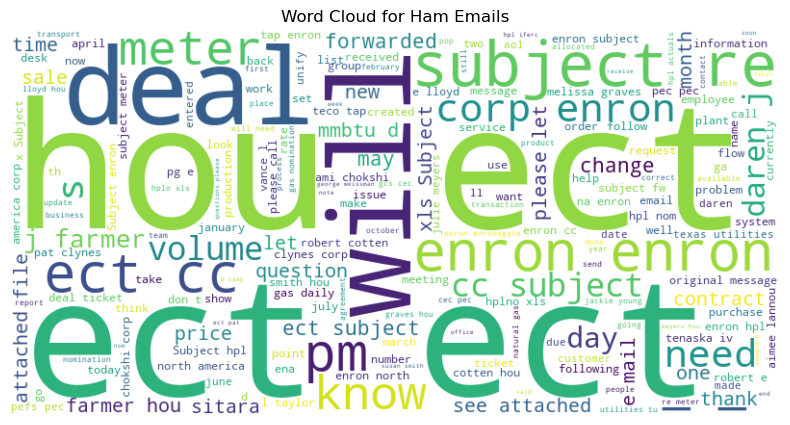

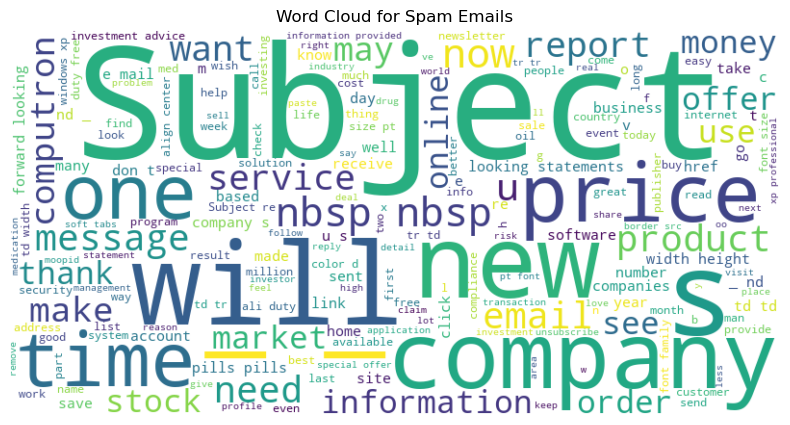

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Make sure your labels are text: "ham" and "spam"
# If you only have numbers (0 = ham, 1 = spam), convert them:
df_small['label'] = df_small['label_num'].map({0: 'ham', 1: 'spam'})

# Ham word cloud
ham_text = " ".join(df_small[df_small['label']=='ham']['text'])
spam_text = " ".join(df_small[df_small['label']=='spam']['text'])

# Ham word cloud
plt.figure(figsize=(10,5))
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Ham Emails")
plt.show()

# Spam word cloud
plt.figure(figsize=(10,5))
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Spam Emails")
plt.show()
